# Classification Algorithm and Iris Exploration

The purpose of this tutorial is to investigate the famous Iris dataset and apply the streaming pipeline of data science procedures on it.

### Motivation for this tutorial
As mentioned by Professor Kolter, most of existing problems can be solved by the common algorithms. And among these algorithms, classification is one of the most important. It can be used in many areas like fraud detection. Also, to become a qualified data scientist, it's important to manipulate data and get insight into it. The proceduces listed in previous slides is quite clear: data collection, data processing, exploration/visiulization and analytics. From Assignment 1, 2 and 3, we have learned parts of these techniques. So my idea is to combine things we've learned so far to get a better understanding. 
Then I began to think about the best way to do it. Actually data collection varies a lot and depends on the application scenerios, so I decide not to dive too deep into this while leave the main idea in classification itself. So I choose Iris, one famous small dataset which is often used in classification algorithms.

# What is Iris
The Iris dataset is a commonly used classification experiment data set collected by Fisher, 1936. Iris, also known as the Iris Flower Data Set, is a set of datasets for multivariate analysis. The data set contains 150 data sets and is divided into 3 categories, 50 data in each category, and each data contains 4 attributes. It is possible to predict which of the three species (Setosa, Versicolour, Virginica) the iris flower belongs to by the four properties of calyx length, calyx width, petal length, and petal width.

Iris uses the characteristics of irises as a source of data and is often used in classification operations. The data set consists of 50 sample data of 3 different types of irises. One of the species is linearly separable from the other two species, and the latter two species are non-linearly separable. The data set contains 5 attributes:

* Sepal.Length (Flower length) in cm
* Sepal.Width (flower width) in cm
* Petal.Length (petal length), unit is cm;
* Petal.Width (petal width), unit is cm;
* Species: Iris Setosa (I. Shan), Iris Versicolour (I. Versicolor), and Iris Virginica (I. Virginia).

# Data Prep
First we need to get the Iris dataset. Since the dataset is quite small, the most common way is to download it from the website: http://aima.cs.berkeley.edu/data/iris.csv. The raw data is stored in .csv format, which is heavily used in previous assignments. We use urllib2 to download and save the file locally. Then we use numpy to do some simple analysis of Iris, to validate the description we mentioned above. 

In [22]:
%matplotlib inline
from urllib.request import urlopen
url = 'http://aima.cs.berkeley.edu/data/iris.csv'
u = urlopen(url)
localfn='iris.csv' #for windows
localf = open(localfn, 'wb')
localf.write(u.read())
localf.close()

In [21]:
from numpy import genfromtxt, zeros
# read the first 4 columns
data = genfromtxt(localfn,delimiter=',',usecols=(0,1,2,3)) 
# read the fifth column
target = genfromtxt(localfn,delimiter=',',usecols=(4),dtype=str)

print(data.shape)
# output: (150, 4)
print(target.shape)
# output: (150,)

#auto build a collection of unique elements
print(set(target))

(150, 4)
(150,)
{'versicolor', 'virginica', 'setosa'}


# Data Visualization
In order to observe the features of Iris, we use pylab library to plot different aspects of the data. In the first figure, two attributes are sepal_length and petal_length; Seond figure is all four features of the dataset. The last one is the average length for setosa, versicolor, virginica and overall respectively.

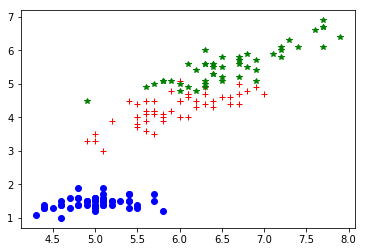

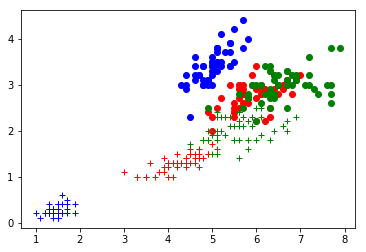

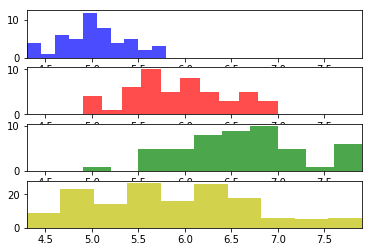

In [23]:
from pylab import plot, show
# figure for sepal length and petal length with repect to different kind
plot(data[target=='setosa',0],data[target=='setosa',2],'bo')
plot(data[target=='versicolor',0],data[target=='versicolor',2],'r+')
plot(data[target=='virginica',0],data[target=='virginica',2],'g*')
show()

#figure for all 4D 
setosa_sepal_x=ssx=data[target=='setosa',0]
setosa_sepal_y=ssy=data[target=='setosa',1]
setosa_petal_x=spx=data[target=='setosa',2]
setosa_petal_y=spy=data[target=='setosa',3]

versicolor_sepal_x=vsx=data[target=='versicolor',0]
versicolor_sepal_y=vsy=data[target=='versicolor',1]
versicolor_petal_x=vpx=data[target=='versicolor',2]
versicolor_petal_y=vpy=data[target=='versicolor',3]

virginica_sepal_x=vgsx=data[target=='virginica',0]
virginica_sepal_y=vgsy=data[target=='virginica',1]
virginica_petal_x=vgpx=data[target=='virginica',2]
virginica_petal_y=vgpy=data[target=='virginica',3]

plot(ssx,ssy,'bo',spx,spy,'b+')
plot(vsx,vsy,'ro',vpx,vpy,'r+')
plot(vgsx,vgsy,'go',vgpx,vgpy,'g+')
show()

#figure for 1D（sepal length) histogram
from pylab import figure, subplot, hist, xlim, show
xmin = min(data[:,0])
xmax = max(data[:,0])

subplot(411) # distribution of the setosa class (1st, on the top)
hist(data[target=='setosa',0],color='b',alpha=.7)
xlim(xmin,xmax)
subplot(412) # distribution of the versicolor class (2nd)
hist(data[target=='versicolor',0],color='r',alpha=.7)
xlim(xmin,xmax)
subplot(413) # distribution of the virginica class (3rd)
hist(data[target=='virginica',0],color='g',alpha=.7)
xlim(xmin,xmax)
subplot(414) # global histogram (4th, on the bottom)
hist(data[:,0],color='y',alpha=.7)
xlim(xmin,xmax)
show()

# Data analysis
After we get the plot above we can start to analyze the data we have, here we uses correlation anaylysis. Understand whether the variables are related, the strengths and weaknesses through the study of the correlation between features. 

From the result tt can be seen that the strongest correlation is: petal width and petal length.

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


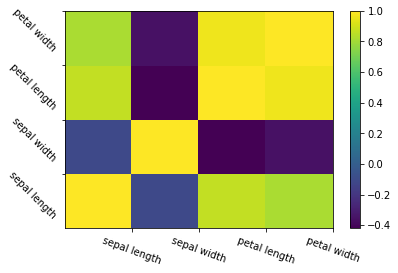

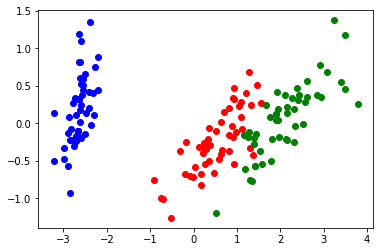

[0.92461621 0.05301557]
0.02236822497519675
0.022368224975196728
2.886579864025407e-15
92.46162071742683 %
97.76317750248033 %
99.481691454981 %
100.0 %


In [45]:
from numpy import corrcoef
corr = corrcoef(data.T)
print(corr)
from pylab import pcolor, colorbar, xticks, yticks
from numpy import arange
pcolor(corr) 
colorbar() 
xticks(arange(1,5),['sepal length',  'sepal width', 'petal length', 'petal width'],rotation=-20)
yticks(arange(1,5),['sepal length',  'sepal width', 'petal length', 'petal width'],rotation=-45)
show()


# Classification
From the previous module, we have some observations about the dataset. For example, one of the flower species are linearly separable (Setosa) while other two are not separable with each other. The model we first use is Naive Bayesian classifier. This one is quite common in classification. And there are several different submodules, including GaussianNB and some other variations. Here we will explore GaussianNB since the assumption of data distribution matches the problem settings well (mean value and bias).

Here we use sklearn to do the modeling. During this process, I think it's better to explore the validation set, which can be used to cure over-fitting since the number trainning samples is not very large. I experimented with several settings, including 100% training sampels, 60% training samples with 40% validation samples. Also I calculated the traning error, validation error and test error respectively.

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
# 1D 0 array
t = zeros(len(target))
# set label
t[target == 'setosa'] = 1
t[target == 'versicolor'] = 2
t[target == 'virginica'] = 3

# train with full dataset (no validation set)
classifier = cf = GaussianNB()
cf.fit(data,t) # training on the iris dataset
# validate first data sample
print(cf.predict(data[0].reshape(1, -1)))
print(t[0])
#output:1.0

# divide train and test samples
train, test, t_train, t_test = cross_validation.train_test_split(data, t, \
test_size=0.4, random_state=0)

print(train.shape)
print(test.shape)
print(t_train.shape)
print(t_test.shape)

# 60% training data, 40% validation data
cf.fit(train,t_train)
print(cf.score(test,t_test))
# calculate training error
cf.score(train,t_train) 

# training error with all data samples
cf.fit(data,t)
cf.score(data,t)

# train with 100% data, and validate with 40%
cf.fit(data,t)
cf.score(test,t_test)

[1.]
1.0
(90, 4)
(60, 4)
(90,)
(60,)
0.9333333333333333


0.95

# Model Evaluation - Part 1
From the training module, we have already get some usable modles. However, how can we evaluate the performance of them? Here we use the idea of confusion matrix. A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabelling one as another).
Sklearn prodives the confusion matrix metrics to evaluate our models. From the result below, we can see class 2 has 3 samples that is misclassified to be class 3 (because they are not linear separable). Besides confusion matrix, we can also use other metrics like precision, recall and F1-score the evaluate the model. Sklearn also includes these metrics in module named classfication_report.

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
print(confusion_matrix(cf.predict(test),t_test))
# other metrics, precision, recall, F1 and support
print(classification_report(classifier.predict(test), t_test, target_names=['setosa', 'versicolor', 'virginica']))

[[16  0  0]
 [ 0 23  3]
 [ 0  0 18]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.88      0.94        26
  virginica       0.86      1.00      0.92        18

avg / total       0.96      0.95      0.95        60



# Model Evaluation - Part 2
The above is only given the amount of data used to support the test classification. Segmentation of data, reduction of the number of samples used for training, and assessment results all depend on the random selection of the paired training set and test set.

If we really want to evaluate a classifier and compare it with other classifiers, we need to use a more accurate assessment model, such as Cross Validation. The idea behind the model is simple: multiple data are divided into different training sets and test sets, and the final classifier evaluates the mean value of multiple predictions.

In [37]:
from sklearn.cross_validation import cross_val_score
from numpy import mean
# cross validation with 6 iterations 
scores = cross_val_score(classifier, data, t, cv=6)
print(scores)
print(mean(scores))

[0.92592593 1.         0.91666667 0.91666667 0.95833333 1.        ]
0.9529320987654321


# K-Means algorithm
From the previous part, we have learned about the basic GaussianNB. Another class of classification is non-supervised classification, which is also called clustering. K-means is the most popular one among these algorithms.

K-means accepts input quantity k, and divides n data objects into k clusters; the obtained cluster satisfies: the similarity of objects in the same cluster is high; the similarity of objects in different clusters is low. Cluster similarity is calculated using a "central object" (gravitation center) obtained from the mean of the objects in each cluster. When applying K-means on Iris, since we know the prior that there are 3 classes, so it may behave better than GaussianNB. 

From the graph below we can see that the cluster on the bottom left can be fully identified by k-means. However, some of the top two clusters have some errors. According to the kmean center object is a clustering method of the gravitational center, it is inevitable that the recognition error occurs, and the accidentality of the sample may cause the recognition error.

0.7649861514489816
0.7514854021988339


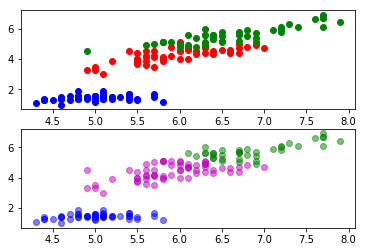

/Users/changke/Desktop/cmu/688/virenv/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


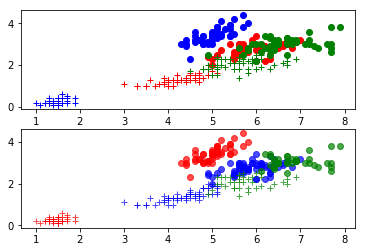

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score
kms = KMeans(n_clusters=3) # prior
kms.fit(data) # training
c = kms.predict(data)

# evaluate model
print(completeness_score(t,c))
print(homogeneity_score(t,c))
figure()
subplot(211) # top figure with the real classes
plot(data[t==1,0],data[t==1,2],'bo')
plot(data[t==2,0],data[t==2,2],'ro')
plot(data[t==3,0],data[t==3,2],'go')
subplot(212) # bottom figure with classes assigned automatically
plot(data[c==1,0],data[c==1,2],'bo',alpha=.5)
plot(data[c==2,0],data[c==2,2],'go',alpha=.5)
plot(data[c==0,0],data[c==0,2],'mo',alpha=.5)
show()

plt.figure()
plt.subplot(211) # top figure with the real classes
plt.plot(data[t==1,0],data[t==1,1],'bo',data[t==1,2],data[t==1,3],'b+')
plt.plot(data[t==2,0],data[t==2,1],'ro',data[t==2,2],data[t==2,3],'r+')
plt.plot(data[t==3,0],data[t==3,1],'go',data[t==3,2],data[t==3,3],'g+')
plt.subplot(212) # bottom figure with classes assigned automatically
plt.plot(data[c==0,0],data[c==0,1],'bo',data[c==0,2],data[c==0,3],'b+',alpha=.7)
plt.plot(data[c==1,0],data[c==1,1],'ro',data[c==1,2],data[c==1,3],'r+',alpha=.7)
plt.plot(data[c==2,0],data[c==2,1],'go',data[c==2,2],data[c==2,3],'g+',alpha=.7)
p=plt
fig=plt.gcf()
fig.show()